# Project. Contexto for popular words in Arab. Basic strategies


In [ ]:
import numpy as np
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim.downloader
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from time import sleep
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/ar/ar_50k.txt

--2023-03-30 05:42:57--  https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/ar/ar_50k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799899 (781K) [text/plain]
Saving to: ‘ar_50k.txt’

ar_50k.txt          100%[===================>] 781.15K  --.-KB/s    in 0.007s  

2023-03-30 05:42:57 (106 MB/s) - ‘ar_50k.txt’ saved [799899/799899]



In [ ]:
file1 = open('ar_50k.txt', 'r')
Lines = file1.readlines()

In [ ]:
with open('arabic_nouns.txt', 'w') as f:
  for line in Lines:
    #print ()
    word = line.split(" ")[0]
    f.write(f"{word}\n")
  #break

In [ ]:
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)

    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    #trim
    text = text.strip()

    return text

In [ ]:
!pip install snowballstemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from snowballstemmer import stemmer

In [ ]:
file1 = open('arabic_nouns.txt', 'r')
Lines = file1.readlines()

In [ ]:
ar_stemmer = stemmer(lang='arabic')

In [ ]:
stemmed_list = []
for line in Lines:
  stemmed_list.append(ar_stemmer.stemWord(line))

In [ ]:
final_nouns =list(set(stemmed_list))

In [ ]:
final_nouns = [noun[:-2] for noun in final_nouns]

In [ ]:
np.random.seed(2807)
nouns = np.random.choice(final_nouns, 1000)
N = len(nouns)

In [ ]:
def simple_game(game_rank):
    target = np.random.randint(N)
    win_flag = False
    attempts = 0
    while True:
        print("Input the number")
        attempt = int(input())
        rank = int(game_rank[target][attempt])
        if attempt == -1:
            break
        print("The rank of your word is " + str(rank))
        attempts += 1
        if rank == 0:
            win_flag = True
            break
    print("Number of attempts is " + str(attempts))
    print("answer is " + str(target))

In [ ]:
# Auxiliary function. Determining the closest number to the number num that has not been used before

def get_nearest_num(num, used, num_set=np.arange(N)):
    if num not in used:
        return num
    min_diff = np.inf
    nearest = np.nan
    for i in num_set:
        if i not in used:
            diff = np.abs(num - i)
            if diff < min_diff:
                min_diff = diff
                nearest = i
    return nearest

In [ ]:
def player_rank_using(target, first_move, game_rank, player_rank):
    attempts = 1
    move = first_move
    used = []
    while target != move:
        attempts += 1
        game_output = int(game_rank[target][move])
        used.append(move)
        next_move = -1
        curr_used = []
        while next_move == -1:
            output = get_nearest_num(game_output, curr_used)
            for k in range(N):
                if player_rank[move][k] == output:
                    next_move = k
            if next_move in used:
                curr_used.append(output)
                next_move = -1
        move = next_move
    return attempts

In [ ]:
def maximum_likelihood_using(target, first_move, game_rank, player_rank):
    attempts = 1
    move = first_move
    used = np.array([False for _ in range(N)])
    sum_diff = np.zeros(N)
    while target != move:
        attempts += 1
        game_output = int(game_rank[target][move])
        used[move] = True
        for k in range(N):
            sum_diff[k] += np.abs(player_rank[k][move] - game_output)
        available_sumdiff = np.where(used, np.inf, sum_diff)
        move = np.argmin(available_sumdiff)
    return attempts

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.8 MB/s eta 0:00:00


In [ ]:
import numpy as np

import torch
import torch.nn.functional as f

from transformers import BertModel, BertTokenizer

from time import sleep

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from abc import ABC
class Analyzer(ABC):
  def __init__(
      self,
      similarity_func,
      bert_version : str,
      device,
      ):
      self.similarity_func = similarity_func

      self.bert_version = bert_version
      self.tokenizer = BertTokenizer.from_pretrained(bert_version)
      self.model = BertModel.from_pretrained(bert_version)

      self.device=device

      self.model = self.model.eval()

  def get_word_emb(
      self,
      token : str
      ):
      encoding = self.tokenizer(
          token,
          padding=True,
          return_tensors='pt'
          ).to(self.device)

      for tokens in encoding['input_ids']:
        self.tokenizer.convert_ids_to_tokens(tokens)

      with torch.no_grad():
        embed = self.model(**encoding)[0]

      avg_embed = embed.mean(dim=1)

      return avg_embed

  def get_similarity(self, embed1, embed2):
      return self.similarity_func(embed1, embed2)[0]

In [ ]:
def experiment(sim, sim_player):
  game_rank = np.zeros((N, N))
  for i in tqdm(range(N)):
      game_rank[i] = np.argsort(np.argsort(sim[i])[::-1])

  player_rank = np.zeros((N, N))
  for i in tqdm(range(N)):
      player_rank[i] = np.argsort(np.argsort(sim_player[i])[::-1])

  rank_difference = np.zeros(N)
  for i in tqdm(range(N)):
      for j in range(N):
          r = game_rank[i][j]
          rank_difference[int(r)] += np.abs(game_rank[i][j] - player_rank[i][j])
  rank_difference /= N
  print(f"Average rank diffirence: {rank_difference.mean()}")

  plt.scatter(np.arange(N), rank_difference, s=1)
  plt.xlabel('rank by game')
  plt.ylabel('abs diff between player and game ranks')
  plt.show()

  print("-"*25)
  print("PRU")
  np.random.seed(42)
  M = 200
  PRU_num_moves_to_win = np.zeros(M)
  for k in tqdm(range(M)):
      i = np.random.choice(N)
      j = np.random.choice(N)
      PRU_num_moves_to_win[k] = player_rank_using(i, j, game_rank, player_rank)

  print(f"Average moves to win in PRU = {PRU_num_moves_to_win.mean()}")
  print(f"Standard deviation of moves to win in PRU = {PRU_num_moves_to_win.std()}")
  print(f"Median of moves to win in PRU = {np.median(PRU_num_moves_to_win)}")

  plt.hist(PRU_num_moves_to_win, bins=25)
  plt.xlabel('attempts for win')
  plt.show()

  print("-"*25)
  print("MLU")
  np.random.seed(42)
  M = 200
  MLU_num_moves_to_win = np.zeros(M)
  for k in tqdm(range(M)):
      i = np.random.choice(N)
      j = np.random.choice(N)
      MLU_num_moves_to_win[k] = maximum_likelihood_using(i, j, game_rank, player_rank)

  print(f"Average moves to win in MLU = {MLU_num_moves_to_win.mean()}")
  print(f"Standard deviation of moves to win in MLU = {MLU_num_moves_to_win.std()}")
  print(f"Median of moves to win in MLU = {np.median(MLU_num_moves_to_win)}")

  plt.hist(MLU_num_moves_to_win, bins=25)
  plt.xlabel('attempts for win')
  plt.show()

In [ ]:
def create_sim_setting(bert_version):
  embed_calc = Analyzer(
    similarity_func=torch.nn.CosineSimilarity(),
    bert_version=bert_version,
    device=device
  )

  N = len(nouns)
  emb_dict = dict()
  for noun in tqdm(nouns):
    emb_dict[noun] = embed_calc.get_word_emb(token=noun)

  sim = np.zeros((N, N))
  for i in tqdm(range(N)):
      for j in range(N):
          sim[i][j] = embed_calc.get_similarity(embed1=emb_dict[nouns[i]], embed2=emb_dict[nouns[j]])

  return sim

In [ ]:
sim = create_sim_setting(bert_version='CAMeL-Lab/bert-base-arabic-camelbert-mix')

Some weights of the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-mix were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1000/1000 [00:43<00:00, 22.76it/s]


In [ ]:
sim_player = create_sim_setting(bert_version='asafaya/bert-base-arabic')

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 1000/1000 [00:46<00:00, 21.48it/s]


In [ ]:
list_of_prefs = [
    (sim, 'CAMeL-Lab/bert-base-arabic-camelbert-mix'),
    (sim_player, 'asafaya/bert-base-arabic'),
    ]

game pref is CAMeL-Lab/bert-base-arabic-camelbert-mix
player pref is asafaya/bert-base-arabic


100%|██████████| 1000/1000 [00:03<00:00, 321.30it/s]


Average rank diffirence: 284.78466399999996


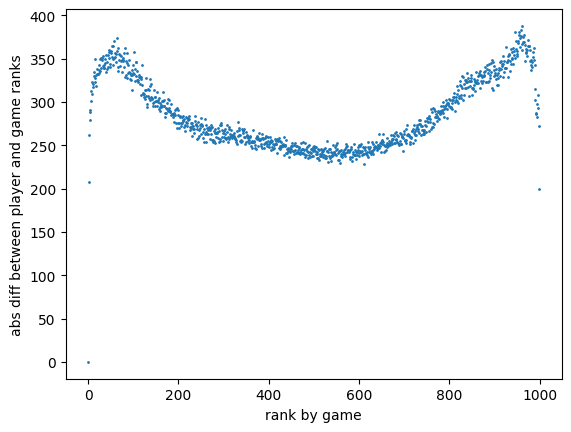

-------------------------
PRU


100%|██████████| 200/200 [03:53<00:00,  1.17s/it]


Average moves to win in PRU = 408.385
Standard deviation of moves to win in PRU = 271.5550345233909
Median of moves to win in PRU = 371.0


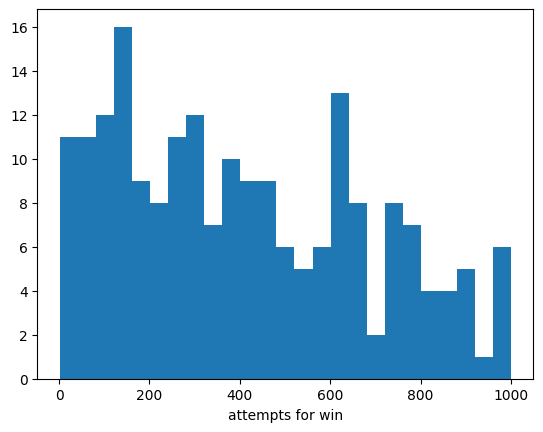

-------------------------
MLU


100%|██████████| 200/200 [01:59<00:00,  1.68it/s]


Average moves to win in MLU = 212.28
Standard deviation of moves to win in MLU = 184.07330496299565
Median of moves to win in MLU = 155.0


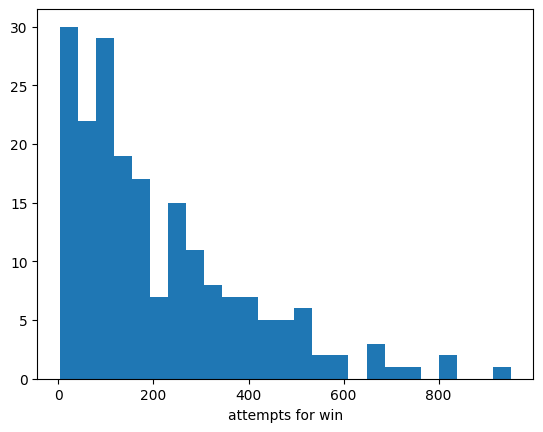

--------------------------------------------------


In [ ]:
for id, (pref, model_name) in enumerate(list_of_prefs):
  for player_pref, player_model_name in list_of_prefs[id+1:]:
    print(f'game pref is {model_name}')
    print(f'player pref is {player_model_name}')
    experiment(sim=pref, sim_player=player_pref)
    print('-'*50)